In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if not activation_function:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [5]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis].astype(np.float32)
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

In [6]:
# xs = tf.placeholder([None, 1]) must have float32
# ys = tf.placeholder([None, 1])

xs = tf.placeholder(tf.float32, [None, 1]) 
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [7]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


# Visualization

0.00293654


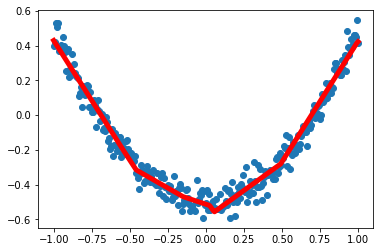

0.0029230625
0.0029118294
0.0029003713
0.0028907622
0.002881821
0.0028742924
0.0028652074
0.0028565165
0.002848144
0.002834692
0.0028258476
0.0028176245
0.0028078286
0.0027965559


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()

for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
plt.show()